In [188]:
import os
from dateutil.parser import parse as dateutil_parse
import time
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.externals import joblib

from mylib import DISTRICTS, request_answer_count

PATH = 'season_1/'
CLEAN_PATH = PATH+'clean/'

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [190]:
cluster_map = pd.read_csv(CLEAN_PATH+'cluster_map.csv',index_col=0)
poi = pd.read_csv(CLEAN_PATH+'poi.csv',index_col=0)

In [270]:
train_order_group = pd.read_pickle(CLEAN_PATH+'train_order_group.pickle')

In [272]:
ra_count = request_answer_count(train_order_group)

In [275]:
ra_count.shape

(66, 42)

In [276]:
poi.shape

(66, 176)

In [305]:
train_cluster = pd.concat([poi, ra_count], axis = 1)
train_cluster

,1,1#1,1#10,1#11,1#2,1#3,1#4,1#5,1#6,1#7,...,answer_12,answer_13,answer_14,answer_15,answer_16,answer_17,answer_18,answer_19,answer_20,answer_21
08232402614a9b48895cc3d0aeb0e9f2,83,83,0,166,249,83,0,581,83,0,...,126.0,124.0,126.0,136.0,141.0,155.0,148.0,159.0,158.0,136.0
08f5b445ec6b29deba62e6fd8b0325a6,83,332,0,83,83,0,166,0,249,83,...,109.0,119.0,115.0,142.0,235.0,169.0,122.0,150.0,123.0,135.0
0a5fef95db34383403d11cb6af937309,83,0,0,332,83,0,83,415,0,83,...,31.0,22.0,23.0,34.0,19.0,20.0,20.0,31.0,25.0,32.0
1afd7afbc81ecc1b13886a569d869e8a,2075,166,249,1909,1328,249,166,7304,0,83,...,13033.0,12647.0,13001.0,14440.0,12493.0,11082.0,12699.0,13961.0,15163.0,15698.0
1c60154546102e6525f68cb4f31e0657,0,0,0,166,0,83,0,249,0,0,...,469.0,417.0,504.0,511.0,558.0,543.0,429.0,436.0,444.0,446.0
1cbfbdd079ef93e74405c53fcfff8567,0,0,0,1162,498,0,83,664,0,0,...,1486.0,1432.0,1493.0,1580.0,1582.0,1375.0,1270.0,1415.0,1589.0,1555.0
1ecbb52d73c522f184a6fc53128b1ea1,830,166,0,249,913,249,166,1494,83,83,...,1034.0,1098.0,1146.0,1238.0,1349.0,1187.0,1196.0,1245.0,1608.0,1668.0
2301bc920194c95cf0c7486e5675243c,0,0,83,498,166,83,0,1245,0,0,...,1051.0,1048.0,1058.0,1154.0,1150.0,1126.0,1134.0,1231.0,1268.0,1312.0
2350be163432e42270d2670cb3c02f80,83,0,0,664,249,0,0,1992,83,0,...,751.0,781.0,825.0,868.0,839.0,863.0,774.0,886.0,906.0,980.0
2407d482f0ffa22a947068f2551fe62c,1743,332,249,830,913,249,332,8134,0,0,...,20530.0,20601.0,20688.0,23388.0,20920.0,18870.0,21048.0,22739.0,24939.0,25124.0


In [306]:
clf = KMeans(n_clusters=8, max_iter=1000)
s = clf.fit(train_cluster)

In [307]:
s

KMeans(copy_x=True, init='k-means++', max_iter=1000, n_clusters=8, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [308]:
clf.labels_

array([0, 0, 0, 5, 0, 0, 0, 0, 0, 3, 5, 0, 5, 5, 0, 0, 0, 0, 6, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 4, 0, 0, 7, 0, 0, 0, 0, 6, 0, 0, 0, 3, 5, 2, 5, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 5, 0, 0, 1, 0, 0, 0, 0, 5, 0, 0, 5, 0])

In [309]:
pd.DataFrame({'label':clf.labels_}, index = train_cluster.index)

,label
08232402614a9b48895cc3d0aeb0e9f2,0
08f5b445ec6b29deba62e6fd8b0325a6,0
0a5fef95db34383403d11cb6af937309,0
1afd7afbc81ecc1b13886a569d869e8a,5
1c60154546102e6525f68cb4f31e0657,0
1cbfbdd079ef93e74405c53fcfff8567,0
1ecbb52d73c522f184a6fc53128b1ea1,0
2301bc920194c95cf0c7486e5675243c,0
2350be163432e42270d2670cb3c02f80,0
2407d482f0ffa22a947068f2551fe62c,3


# 用来评估簇的个数是否合适，距离越小说明簇分的越好

In [283]:
cluster_num = []
score = []
for i in range(1,15,1):
    clf = KMeans(n_clusters=i)
    s = clf.fit(poi)
    cluster_num.append(i)
    score .append(clf.inertia_)

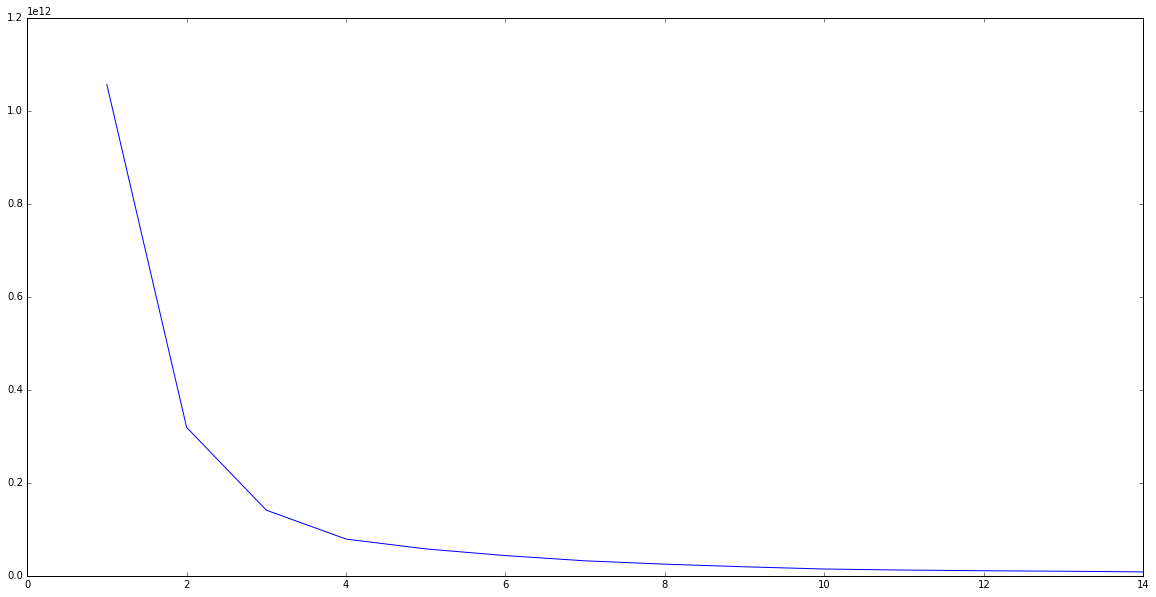

In [284]:
plt.figure(figsize=(20,10))
plt.plot(cluster_num, score)